In [1]:
import tensorflow as tf
print(tf.__version__)
print(len(tf.config.list_physical_devices('GPU'))>0)  #can ignore this cell if dont have Nvidia GPU

2.10.0
True


In [2]:
import keras
keras.__version__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json                       #use keras as machine learning framework

In [3]:
with open('E:/test/test.json','rb') as f:  #open json file put it in dataframe
    test_data = json.load(f)               #note that test file does not have label
    test_df=pd.DataFrame(test_data)
test_df

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [4]:
with open('E:/test/train.json','rb') as f:  #same for train data
    train_data = json.load(f)
    train_df=pd.DataFrame(train_data)
train_df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


## Data pre-processing
ingredients variable are in text format,we need to vectorize the string first.To vectorize the string, there are two possibilities: we could just cast the label list as an integer tensor, or we could use a "one-hot" encoding. One-hot encoding is a widely used format for categorical data, also called "categorical encoding".
For this fully-connected neural network,  we use One-hot encoding, and parameter 'id' is not used in predicting the class because it does not help in predicting 

Step1: convert the df to numpy array first 

In [5]:
#Step1: convert the df to numpy array first 
test_ingredients=test_df['ingredients'].to_numpy()    
train_ingredients=train_df['ingredients'].to_numpy()
train_label=train_df['cuisine'].to_numpy()  
train_ingredients

array([list(['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']),
       list(['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']),
       list(['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']),
       ...,
       list(['eggs', 'citrus fruit', 'raisins', 'sourdough starter', 'flour', 'hot tea', 'sugar', 'ground nutmeg', 'salt', 'ground cinnamon', 'milk', 'butter']),
       list(['boneless chicken skinless thigh', 'minced garlic', 'steamed white rice', 'baking powder', 'corn starch', 'dark soy sauce', 'kosher salt', 'peanuts', 'flour', 'scallions', 'Chinese rice vinegar', 'vodka', 'fresh ginger', 'egg whites', 'broccoli', 'toasted sesame seeds', 'sugar', 'store bought low

Step2: convert the each ingredient to their own index by looking up to a dictionary(hash table)
.Length of the ingredients dictionary is 6714 because the ingredients total 6714.Code below will output a array the contain the all indices of the ingredients for each cuisine.for example cuisine 0(first cuisine) contains 'eggs' abd 'minced garlic'. If eggs' index is 50, minced garlic' index is 66.for cusine 0 the array will be [50,66]

In [6]:
def get_dict_from_ingred_arr(ingred_arr): #output a dictionary to lookup for the index of ingredients
    ingred_dict = {}
    for i, ingredient in enumerate(ingred_arr):
        for ingred in ingredient:
            if ingred not in ingred_dict: #if ingredient doesnot exist
                ingred_dict[ingred] = len(ingred_dict) #add that ingredient and assign them a index
                
    return ingred_dict

def convert_ingred_arr_to_idx_lst(ingred_arr,ingred_arr_dict):#output index by lookup to dicionary
    ingred_idx_lst=[]
    for i, ingredient in enumerate(ingred_arr):
        temp_list=[]
        for ingred in ingredient:
            temp_list.append(ingred_arr_dict[ingred])
        ingred_idx_lst.append(temp_list)   
        
    return ingred_idx_lst

ingrad_dict=get_dict_from_ingred_arr(train_ingredients)
train_ingrad_idx_lst=convert_ingred_arr_to_idx_lst(train_ingredients,ingrad_dict)
no_ingredient=len(ingrad_dict)
train_ingrad_idx_lst #you can observe what we get here

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 [29, 19, 30, 11],
 [31,
  32,
  33,
  34,
  35,
  36,
  18,
  27,
  11,
  37,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [9, 47, 27, 15, 48, 11, 49, 18, 50, 51, 52, 53],
 [54, 11, 55, 4, 3, 56, 57, 58, 59, 60, 61, 46, 62],
 [47, 63, 64, 65, 50, 54, 66, 15, 53, 67],
 [54, 5, 68, 69, 70, 71, 72, 13, 11, 73, 74, 57, 75],
 [76, 77, 3, 78, 79, 58],
 [80, 81, 82, 54, 3, 83, 4, 84, 85, 86, 87, 1, 88],
 [89, 90, 91, 92, 93, 94, 95, 86, 47, 96, 3, 97, 29, 98, 99],
 [100, 101, 102, 78, 103, 104, 105, 106, 107, 58],
 [49, 108, 38, 109, 79, 13, 3, 110, 111, 112, 113, 11, 41, 31, 54, 98, 35],
 [114, 27, 115, 116, 117, 118, 13, 119, 120, 121, 122, 11],
 [123, 124, 12, 43, 125, 126, 127, 35, 128, 129],
 [130, 131, 132, 133],
 [134, 135, 20, 136],
 [47, 137, 138, 112],
 [26, 19, 139, 140, 141, 142, 143, 144, 11, 145, 146, 147, 99],
 [148, 149, 75, 150, 151, 

## One-hot-encode
Step3:

We cannot feed arrays of integers into a neural network yet. 
We could one-hot-encode our arrays to turn them into vectors of 0s and 1s.this would mean for instance turning the array [15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28] into a 6714-dimensional vector that would be all-zeros except for indices 15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28.

In [7]:
def vectorize_sequences(sequences, dimension=no_ingredient):
    results = np.zeros((len(sequences), dimension)) #create a 2d all 0 array (dim=39774x6714) 
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_ingrad_idx_lst,no_ingredient)
x_train[1][1:100]#you can observe what we get here for cusine 1 and its ingredients indices. 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
print(train_label)
ingrad_dict

['greek' 'southern_us' 'filipino' ... 'irish' 'chinese' 'mexican']


{'romaine lettuce': 0,
 'black olives': 1,
 'grape tomatoes': 2,
 'garlic': 3,
 'pepper': 4,
 'purple onion': 5,
 'seasoning': 6,
 'garbanzo beans': 7,
 'feta cheese crumbles': 8,
 'plain flour': 9,
 'ground pepper': 10,
 'salt': 11,
 'tomatoes': 12,
 'ground black pepper': 13,
 'thyme': 14,
 'eggs': 15,
 'green tomatoes': 16,
 'yellow corn meal': 17,
 'milk': 18,
 'vegetable oil': 19,
 'mayonaise': 20,
 'cooking oil': 21,
 'green chilies': 22,
 'grilled chicken breasts': 23,
 'garlic powder': 24,
 'yellow onion': 25,
 'soy sauce': 26,
 'butter': 27,
 'chicken livers': 28,
 'water': 29,
 'wheat': 30,
 'black pepper': 31,
 'shallots': 32,
 'cornflour': 33,
 'cayenne pepper': 34,
 'onions': 35,
 'garlic paste': 36,
 'lemon juice': 37,
 'chili powder': 38,
 'passata': 39,
 'oil': 40,
 'ground cumin': 41,
 'boneless chicken skinless thigh': 42,
 'garam masala': 43,
 'double cream': 44,
 'natural yogurt': 45,
 'bay leaf': 46,
 'sugar': 47,
 'fresh ginger root': 48,
 'ground cinnamon': 49,
 

Step 3 have finished the data preparation for x_train,now deal with label(cuisine)
Step 4:We one-hot-encode the label by the same ideas.

In [9]:
def get_cusine_dict(cusine_arr):
    cusine_dict = {}
    for cusine in cusine_arr:
        if cusine not in cusine_dict:
            cusine_dict[cusine] = len(cusine_dict)
    return cusine_dict

def get_cusine_idx(cusine_arr):
    cusine_dict = {}
    for cusine in cusine_arr:
        if cusine not in cusine_dict:
            cusine_dict[cusine] = len(cusine_dict)
    return cusine_dict

def convert_cusine_arr_to_idx_lst(cusine_arr,cusine_dict):
    cusine_idx_lst=[]
    for cusine in cusine_arr:
        cusine_idx_lst.append(cusine_dict[cusine])

    return cusine_idx_lst

label_dict=get_cusine_dict(train_label)
print(label_dict)
no_label=len(label_dict)
print("No of label(cusine):",no_label)
label_idx_lst=convert_cusine_arr_to_idx_lst(train_label,label_dict)
label_idx_lst #array of the index integer label

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}
No of label(cusine): 20


[0,
 1,
 2,
 3,
 3,
 4,
 5,
 6,
 7,
 6,
 6,
 8,
 6,
 7,
 6,
 3,
 9,
 6,
 10,
 11,
 10,
 7,
 1,
 8,
 6,
 8,
 12,
 6,
 8,
 7,
 6,
 12,
 7,
 10,
 6,
 12,
 6,
 2,
 1,
 1,
 6,
 13,
 7,
 3,
 7,
 8,
 14,
 1,
 1,
 1,
 15,
 1,
 6,
 1,
 6,
 4,
 15,
 3,
 6,
 16,
 10,
 10,
 3,
 4,
 6,
 10,
 17,
 14,
 14,
 1,
 5,
 3,
 18,
 6,
 6,
 18,
 18,
 11,
 15,
 7,
 12,
 1,
 14,
 3,
 3,
 6,
 6,
 3,
 17,
 5,
 6,
 1,
 1,
 0,
 7,
 7,
 1,
 3,
 6,
 6,
 6,
 15,
 6,
 0,
 17,
 3,
 7,
 1,
 16,
 17,
 8,
 7,
 1,
 8,
 18,
 16,
 8,
 16,
 7,
 6,
 6,
 6,
 4,
 7,
 15,
 5,
 8,
 7,
 9,
 3,
 10,
 1,
 7,
 5,
 14,
 6,
 3,
 9,
 5,
 6,
 17,
 3,
 7,
 7,
 1,
 14,
 12,
 3,
 8,
 6,
 6,
 6,
 1,
 0,
 15,
 12,
 6,
 17,
 7,
 3,
 6,
 7,
 17,
 8,
 14,
 8,
 5,
 8,
 5,
 15,
 7,
 14,
 15,
 7,
 6,
 2,
 1,
 6,
 6,
 8,
 7,
 3,
 17,
 7,
 7,
 15,
 0,
 7,
 1,
 8,
 9,
 15,
 6,
 7,
 16,
 0,
 12,
 15,
 6,
 1,
 1,
 1,
 6,
 3,
 8,
 15,
 7,
 7,
 14,
 7,
 7,
 16,
 8,
 7,
 0,
 17,
 7,
 5,
 6,
 1,
 6,
 7,
 14,
 7,
 14,
 2,
 7,
 7,
 6,
 7,
 1,
 6,
 15,
 6,
 7,


In [10]:
def to_one_hot(labels, dimension=no_label):#convert the integer index to 0 or 1
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(label_idx_lst)
print((one_hot_train_labels).shape)
#dimension of the one hot label is 39774x20  20 is the total number of cuisine
one_hot_train_labels[0] #you can observe what we get here for cuisine 0

(39774, 20)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Step5:building the network!

In [11]:
from keras import models
from keras import layers
from keras.layers import Flatten, Dense
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import  PReLU
from keras.models import Sequential
from keras.layers import Embedding
from keras.initializers import Constant
from keras.layers import Embedding, SimpleRNN
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6714,)))
model.add(Dropout(0.5))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))

#network should end with a softmax activation,
#so that it will output a probability distribution over the 20 output classes.
model.add(layers.Dense(20, activation='softmax'))  
model.compile('rmsprop', #"adam" 'rmsprop' ,'SGD' 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=28,
                    batch_size=512,
                    validation_split=0.2)#we will use 20% of the data to validate our model
                                         #to do fine tuning, once we decide our parameter
                                         #and get the optimal no of epoch
                                         #we can delete the line'validation_split=0.2'
                                         #to train all the training data,after trial and errors,
                                         #we get optimal epoch=28,after 28 the model start overfitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                429760    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 p_re_lu (PReLU)             (None, 64)                64        
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 431,124
Trainable params: 431,124
Non-trainable params: 0
_________________________________________________________________
Epoch 1/28
63/63 [==============================] - 2s 9ms/step - loss: 2.3650 - accuracy: 0.4579 - val_loss: 1.8222 - val_accuracy: 0.5656
Epoch 2/28
63/63 [========================

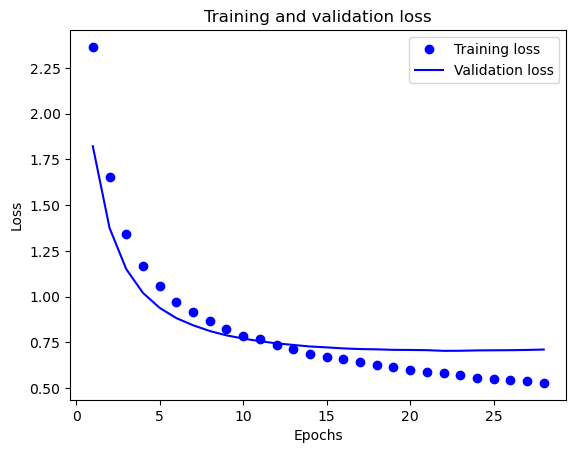

In [12]:
import matplotlib.pyplot as plt   #plot the graph, we can observe the point that validation loss stop dropping

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Final step:predict results on test data
for test data, we found that some ingredients from test data are not included in train data. 
when we predict the results, we need to exclude the ingredients that are not trained in the network.
to predict the result,we also need to do one-hot-encode for test data.

In [13]:
test_df 

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [14]:
test_data=test_df['ingredients']

In [15]:
test_data

0       [baking powder, eggs, all-purpose flour, raisi...
1       [sugar, egg yolks, corn starch, cream of tarta...
2       [sausage links, fennel bulb, fronds, olive oil...
3       [meat cuts, file powder, smoked sausage, okra,...
4       [ground black pepper, salt, sausage casings, l...
                              ...                        
9939    [large egg yolks, fresh lemon juice, sugar, bo...
9940    [hot sauce, butter, sweet potatoes, adobo sauc...
9941    [black pepper, salt, parmigiano reggiano chees...
9942    [cheddar cheese, cayenne, paprika, plum tomato...
9943    [cold water, olive oil, lime wedges, garlic cl...
Name: ingredients, Length: 9944, dtype: object

In [16]:
test_dict=get_dict_from_ingred_arr(test_data)

In [18]:
ingred_traindata_doesnot_exist_lst=[]
test_ingred_idx_lst=[]
for i, ingredient in enumerate(test_data):
        temp_list=[]
        for ingred in ingredient:
            if ingred in ingrad_dict:
                temp_list.append(ingrad_dict[ingred])
    #         print(i,ingred,ingred_arr_dict[ingred])
        test_ingred_idx_lst.append(temp_list) 
        

test_ingred_idx_lst    

[[53, 15, 115, 494, 18, 229],
 [47, 597, 99, 755, 1349, 1749, 18, 50, 369, 579, 1979],
 [1728, 285, 2822, 54, 2699, 35],
 [5587,
  2332,
  1383,
  748,
  215,
  210,
  29,
  184,
  206,
  105,
  3016,
  1248,
  19,
  115,
  252,
  58,
  42,
  350,
  330,
  25,
  625],
 [13, 11, 392, 335, 699, 1074, 29, 78],
 [53, 115, 3118, 99, 191, 37, 312, 11, 229],
 [4537, 524, 6258],
 [51, 93, 228, 1082, 47, 382, 19, 1069, 140, 161, 797, 99, 60, 26, 204, 3],
 [1125,
  569,
  115,
  75,
  41,
  49,
  19,
  638,
  447,
  29,
  2167,
  681,
  696,
  140,
  2158,
  244,
  82],
 [15,
  1630,
  1583,
  3893,
  49,
  582,
  1708,
  50,
  3892,
  2855,
  443,
  494,
  2302,
  1797,
  27,
  2450],
 [664, 54, 305, 601, 307, 2287, 261, 551, 11, 141, 3],
 [29, 27, 4700, 530, 49, 190, 115, 35, 346, 18, 819, 8, 1311, 526, 34, 82],
 [275, 41, 726, 280, 51, 256, 821, 75],
 [664, 169, 230, 1219, 261, 11, 713],
 [11, 2248, 229, 15, 506, 415],
 [480, 579, 2014, 15, 2263, 817, 145, 640, 1352, 1115, 373, 311, 11],
 [20

In [30]:
x_test=vectorize_sequences(test_ingred_idx_lst)
x_test[0][0:100] #now we have one-hot-encode our test data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
y_test_predict=model.predict(x_test)#predict result

311/311 [==============================] - 0s 617us/step


In [21]:
print(y_test_predict.shape)#output probabilities of 20 classes.
y_test_predict  #results will look like this, we need to pick the class that has highest probability.

(9944, 20)


array([[2.4403658e-02, 6.1870776e-02, 6.1263926e-02, ..., 1.1173371e-02,
        1.1679578e-02, 1.0310462e-01],
       [1.2402598e-06, 9.9434692e-01, 6.9304544e-05, ..., 7.2905796e-06,
        3.1522089e-07, 1.3082070e-05],
       [2.8150068e-03, 1.1717204e-03, 1.9120770e-04, ..., 3.5446723e-05,
        2.2498693e-03, 2.0464449e-03],
       ...,
       [7.7598501e-04, 8.2206464e-04, 6.8070422e-06, ..., 3.7067261e-07,
        2.2944043e-06, 4.4472741e-05],
       [1.2670602e-08, 9.8548245e-01, 1.3300458e-07, ..., 8.9126049e-09,
        3.9171524e-09, 1.4005492e-07],
       [5.1064292e-16, 8.5545107e-13, 6.2895534e-15, ..., 8.3937914e-20,
        4.0050254e-16, 6.2899343e-16]], dtype=float32)

In [22]:
#pick the highest probability and lookup to the dictionary by index of highest probability 
test_label=[]
for i, Probabilities in enumerate(y_test_predict):
    maxP=np.max(Probabilities)
    max_indice=np.where(Probabilities == maxP)[0][0]       
    test_label.append((list(label_dict)[max_indice]))
        
print(len(test_label))
test_label   #now we can get all the test results

9944


['british',
 'southern_us',
 'italian',
 'cajun_creole',
 'italian',
 'southern_us',
 'italian',
 'chinese',
 'mexican',
 'british',
 'italian',
 'greek',
 'indian',
 'italian',
 'british',
 'italian',
 'mexican',
 'southern_us',
 'mexican',
 'southern_us',
 'japanese',
 'indian',
 'irish',
 'vietnamese',
 'italian',
 'southern_us',
 'vietnamese',
 'korean',
 'italian',
 'italian',
 'mexican',
 'thai',
 'mexican',
 'japanese',
 'chinese',
 'mexican',
 'russian',
 'indian',
 'indian',
 'cajun_creole',
 'cajun_creole',
 'chinese',
 'french',
 'mexican',
 'italian',
 'italian',
 'spanish',
 'indian',
 'vietnamese',
 'chinese',
 'italian',
 'thai',
 'indian',
 'filipino',
 'italian',
 'chinese',
 'italian',
 'japanese',
 'chinese',
 'jamaican',
 'french',
 'mexican',
 'filipino',
 'korean',
 'mexican',
 'greek',
 'filipino',
 'thai',
 'italian',
 'italian',
 'italian',
 'indian',
 'thai',
 'vietnamese',
 'indian',
 'japanese',
 'indian',
 'mexican',
 'southern_us',
 'greek',
 'chinese',
 '

In [23]:
test_id=test_df['id']

In [24]:
test_id #the competition require id to be in column 1, cuisine in column 2 

0       18009
1       28583
2       41580
3       29752
4       35687
        ...  
9939    30246
9940    36028
9941    22339
9942    42525
9943     1443
Name: id, Length: 9944, dtype: int64

In [25]:
test_result=np.column_stack((test_id, test_label))

In [26]:
test_result

array([['18009', 'british'],
       ['28583', 'southern_us'],
       ['41580', 'italian'],
       ...,
       ['22339', 'italian'],
       ['42525', 'southern_us'],
       ['1443', 'mexican']], dtype='<U21')

In [27]:
import openpyxl   #write this array into excel file, and we manually save .xlsx file as .csv and then we can submit in kaggle website

# Generate dataframe from list and write to xlsx.
pd.DataFrame(test_result).to_excel('E:/test/test_result.xlsx', header=True, index=False)
#for now not sure how to directly convert to csv, use this method first